# CS412 - Machine Learninig - 2022-2023
## Homework 4 - 100 pts


## Goal

The goal of this homework is two-fold:

*   Introduction to the Transfer Learning
*   Gain experience with three dimensional input data (colored images), and pretrained models (Part-A)

## Dataset
[**CelebA**](https://www.cs.toronto.edu/~kriz/cifar.html) is a large-scale face attributes dataset with more than 200K celebrity images, each with 40 attribute annotations. The images in this dataset cover large pose variations and background clutter.

**Download the data from Sucourse and upload it to your Google drive. In your Google drive, you need to have CelebA30k.zip and CelebA30k.csv uploaded. (Do not change the name of these files.) Reserve 10% of the training data for validation and %10 for test** and  **use the rest for development (learning your models). The test data (3000 samples) should only be used for testing at the end, and not model selection.**

## Task
Build a classifier with the Keras library function calls and pretrained models to *classify gender* in the CelebA dataset, completing the given code and without changing the network.


## Software: 

Keras is a library that we will use especially for deep learning, but also with basic neural network functionality of course. 

You may find the necessary function references here: 

http://scikit-learn.org/stable/supervised_learning.html

https://keras.io/api/

https://keras.io/api/applications/

When you search for Conv2d for instance, you should find the relevant function and explained parameters, easily.

## Submission: 
Fill this notebook. Follow the submission/answer requirements in SuCourse. 

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##1) Initialize

*   First make a copy of the notebook given to you as a starter.

*   Make sure you choose Connect form upper right.

*   Make sure you change your runtime to GPU.

## 2) Load training dataset

*  Read from Keras library.

In [45]:
# load data
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [46]:
# import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io
from numpy import random
from PIL import Image

import keras
import tensorflow as tf
from keras import layers
from keras.layers import Input, Dense, Activation, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.layers import Dropout
from keras.regularizers import l2
from keras.regularizers import l1
np.random.seed(5)
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
# from keras.preprocessing.image import load_img,img_to_array,array_to_img,save_img
import cv2
import os
%matplotlib inline

In [47]:
data = pd.read_csv('/content/drive/My Drive/CS412/Homeworks/celeba_30k.csv') # enter the file path on your drive for the csv file
data.head()

,image_id,Male,Blond_Hair,Eyeglasses,Wearing_Earrings,Bangs,Young,Smiling,Heavy_Makeup,Straight_Hair,Black_Hair
0,000001.jpg,0,0,0,1,0,1,1,1,1,0
1,000002.jpg,0,0,0,0,0,1,1,0,0,0
2,000003.jpg,1,0,0,0,0,1,0,0,0,0
3,000004.jpg,0,0,0,1,0,1,0,0,1,0
4,000005.jpg,0,0,0,0,0,1,0,1,0,0


In [48]:
gender_data = data[['image_id', 'Male']].copy()
gender_data.head()

,image_id,Male
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,1
3,000004.jpg,0
4,000005.jpg,0


In [49]:
#this will extract the contents of the zip file into a folder named data
#do not extract the zip into your google drive (i.e don't use drive/My Drive in the right path since it slows down the process)
#only change the left path

!unzip "/content/drive/My Drive/CS412/Homeworks/celeba_30k.zip" -d "/content/data"

Archive:  /content/drive/My Drive/CS412/Homeworks/celeba_30k.zip
replace /content/data/celeba_30k/000001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [50]:
#/content/data'ya dosyamızı extractladık.
first_image_path = os.path.join("/content/data/celeba_30k/", gender_data.loc[0,"image_id"])

#image path'daki görüntüyü açar ve image değişkenine atar. PIL kütüphanesi kulanarak görüntüyü yükler.
img = Image.open(first_image_path) 

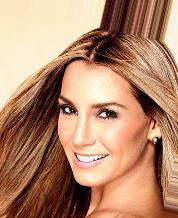

In [51]:
img

##3) Visualizing/Understanding the dataset

- Display five random images together with their labels

- Display statistics about the dataset, such as distribution of labels, etc.


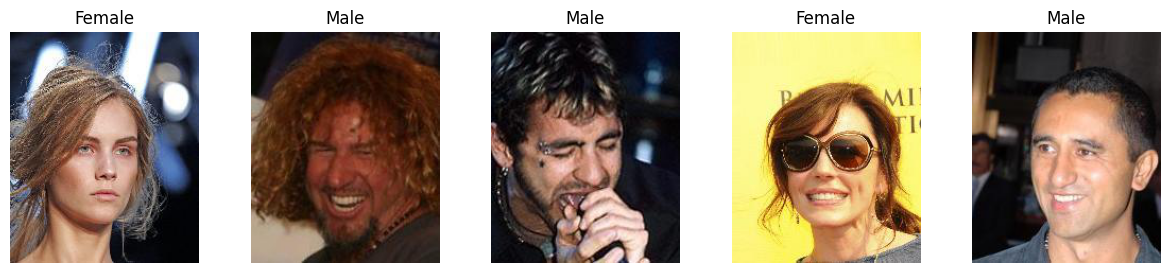

In [52]:
# plot random 5 images in your dataset with their labels

#----------------------------------------
#Kullandığım kütüphanelerin açıklaması:

#1-pandas kütüphanesini gender_data veri çerçevesini oluşturmak ve manipüle etmek için kullanılır.
#import pandas as pd

#2-PIL kütüphanesinin açılımı "Python Imaging Library"dir. Görüntüleri yüklemek, açmak ve manipüle etmek için kullanılır.
#from PIL import Image

#3- matplotlib kütüphanesi görüntüleri çizmek ve görselleştirmek için kullanılır.
#import matplotlib.pyplot as plt
#----------------------------------------

# Randomly select 5 images from the dataset
random_images = gender_data.sample(n=5)

# Plot the randomly selected images
#1 satır ve 5 sütuna sahip bir subplot figürü oluşturur. figsize parametresi, subplot figürünün genişliğini ve yüksekliğini belirtir.
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i, (_, row) in enumerate(random_images.iterrows()):
    image_path = os.path.join("/content/data/celeba_30k/", row["image_id"])

    #image path'daki görüntüyü açar ve image değişkenine atar. PIL kütüphanesi kulanarak görüntüyü yükler.
    image = Image.open(image_path)

    #label değişkenine male veya female ismini verir.
    if row["Male"] == 1:
      label = "Male"
    else:
      label = "Female"
    
    #görüntüyü grafiğin üzerine yükler
    axes[i].imshow(image)
    #label'ı grafiğin üzerine ayarlar
    axes[i].set_title(label)
    #bu kod ise grafiğin x ve y eksenini yok eder.
    axes[i].axis("off")

#grafikleri yazdırır.
plt.show()

##4) Split the dataset as train (also called development) (80%) and validation (10%) and test (10%) set. You'll tune the hyperparameters using the validation set and evaulate the model on the unseen test set. 

In [53]:
gender_data["Male"] = gender_data["Male"].replace({0: 'Female', 1: 'Male'}) 

In [54]:
# Bütün verileriSplit 80-10-10 şeklinde bölüyorum

#sklearn kütüphanesini bölmek için kullanıyorum.
from sklearn.model_selection import train_test_split 

#validation seti 10% olarak kenara ayırdık. train set ise 90% kaldı.
train_df, val_df = train_test_split(gender_data, test_size=0.1, random_state=42, shuffle = True)

#geri kalan %90 train setinden, test setini total setin %10'u olacak şekilde yani 1/9 kenara ayırdık
train_df, test_df = train_test_split(train_df, test_size=1/9, random_state=42, shuffle = True) #since 0.9 * (1/9) = 0.1


In [55]:
#where you extracted the zip file
data_path = "/content/data/celeba_30k"
#total train set sayısı
total_train = train_df.shape[0]
#total validation set sayısı
total_validate = val_df.shape[0]

#print(total_train)
#print(total_validate)

#For batch size, you can try using 8 or 16 images. 
#In general larger batch sizes are more reliable but slows down training and also may not fit in memory depending on the size of the inputs.
batch_size = 8

#create the test_generator accordingly
from keras.preprocessing.image import ImageDataGenerator

#Augmentations" terimi, veri artırma veya veri genişletme anlamına gelir. 
#Makine öğrenimi ve derin öğrenme alanlarında, veri setinin çeşitliliğini artırmak amacıyla mevcut veriye çeşitli dönüşümler ve manipülasyonlar uygulama işlemidir.
train_datagen = ImageDataGenerator() #augmentations for training set... https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    data_path, 
    x_col='image_id',
    y_col='Male',
    class_mode='binary',
    target_size=(224,224), #this will resize the image, you can change the size
    batch_size=batch_size
)

val_datagen = ImageDataGenerator() #augmentations for validation set

val_generator = val_datagen.flow_from_dataframe(
    val_df, 
    data_path, 
    x_col='image_id',
    y_col='Male',
    target_size=(224,224),
    class_mode='binary',
    batch_size=batch_size
)

Found 24000 validated image filenames belonging to 2 classes.
Found 3000 validated image filenames belonging to 2 classes.


##5) Transfer Learning with VGG-16

We will create the base model from the well-known VGG-16 model. This is pre-trained on ImageNet dataset, a large dataset consisting of 1.4M images and 1000 classes.

First, you need to pick which layer of VGG-16 you will use for feature extraction. The very last classification layer (called "top", as most diagrams of machine learning models go from bottom to top) is not very useful. Instead, you will follow the common practice to depend on the very last layer before the flatten operation. This layer is called the "bottleneck layer". The bottleneck layer features retain more generality as compared to the final/top layer.

You'll also load the pretrained weights from ImageNet by specifying weights='imagenet'. 


In [56]:
#VGG-16 modelini ekledik.
#"VGG" ismi, ağı geliştiren Visual Geometry Group'dan gelir. Ağı oluşturan 16, toplam katman sayısını ifade eder. 
#VGG-16 ağı, evrişimli sinir ağı (Convolutional Neural Network - CNN) mimarisinin birçok katmanını kullanır.
#Temel olarak, girdi olarak bir görüntü alır ve bu görüntüyü özniteliklerine ayrıştırmak için bir dizi evrişimli katmanı kullanır. 
#Ardından, tamamen bağlı katmanlar ile bu öznitelikleri sınıflara tahmin etmek için kullanır.
from keras.applications.vgg16 import VGG16


#1-IMAGENET: Burada, "imagenet" parametresi verilerek, VGG16 modeli ImageNet veri kümesi üzerinde eğitilmiş ağırlıklarla yüklenir. ImageNet, milyonlarca görüntüden oluşan geniş bir veri kümesidir ve çeşitli nesne sınıflarını içerir.
#2-INPUT_SHAPE: input_shape argümanı, girdi görüntülerinin boyutunu belirtir. VGG16 modeli için, varsayılan girdi boyutu 224x224x3'tür.
#3-INCLUDE_TOP: include_top argümanı true ise VGG16 modelinin tamamının, false ise sadece özellik çıkarma katmanlarının kullanılıp kullanılmayacağını belirler.
base_model = VGG16(weights='imagenet', input_shape = (224,224,3), include_top=False)
base_model.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

By setting the trainable attribute to False, we ensure that the original (ImageNet) weights of the model will remain constant.

Note that it is possible to adjust the number of trainable layers by modifying the for loop.

In [57]:
#By setting the trainable attribute to False, we ensure that the original (ImageNet) weights of the model will remain constant.

#layer.trainable = False ifadesi, her bir katmanın trainable özelliğini False olarak ayarlar. Yani, VGG16 modelinin tüm katmanları eğitilemez hale getirilir.
#Bu kod parçasının amacı, VGG16 modelinin önceden eğitilmiş ağırlıklarını korurken, yeni bir veri setine uyum sağlamak için modelin daha üstteki (tamamen bağlı) katmanlarını eğitilemez hale getirmektir. 
#Böylece, önceden eğitilmiş ağırlıkların değişmeden kalması ve yalnızca yeni veri setine özgü katmanların eğitilmesi sağlanır.
for layer in base_model.layers:
    layer.trainable = False

We need a binary classifier (Male/Female) which we will add manually on top of the pre-trained model. This layer is usually called "classification head". 


In [58]:
def gender_model(base_model, img_shape = (224,224,3)):
    
    #---------------------------------
    # create the input layer (Same as the imageNetv2 input size)
    # Giriş katmanını oluştur (ImageNetv2 giriş boyutuyla aynı)
    inputs = tf.keras.Input(shape=img_shape) 
    #---------------------------------


    #---------------------------------
    # Forward pass to get the output of the last pooling layer
    # İleri yönlü geçiş ile "last pooling" katmanının çıktısını al
    #Bu kod satırı, önceden eğitilmiş bir VGG16 modelindeki tüm katmanlardan geçerek, son pooling katmanının çıktısını alır.
    X = base_model(inputs)
    #---------------------------------


    #---------------------------------
    #Flatten the output
    #Bu nedenle, tf.keras.layers.Flatten() işlemi, son pooling katmanının çıktısını bir düzleştirme işlemine tabi tutar ve sonuç olarak 1D bir tensör elde edilir. 
    #Bu tensör, ardından özel olarak eğitilen sınıflandırma katmanlarından geçirilerek, örneğin cinsiyet sınıflandırması yapmak için kullanılabilir.
    X = layers.Flatten()(X)
    #---------------------------------


    #---------------------------------
    #TENSÖR nedir?
    #Tensor (Tensör), çok boyutlu matrislere benzer bir yapıdır. Genellikle yapay sinir ağları gibi makine öğrenimi uygulamalarında verileri temsil etmek için kullanılır.
    #---------------------------------

    #---------------------------------
    # Define the new binary classification head 
    # Yeni ikili sınıflandırma head'ini tanımla
    X = tf.keras.layers.Dense(256, activation='relu')(X)
    X = tf.keras.layers.Dropout(0.5)(X)
    X = tf.keras.layers.Dense(1, activation='sigmoid')(X)
    #---------------------------------

    
    outputs = X
    model = tf.keras.Model(inputs, outputs)
    
    return model

## 6-) Fine-Tuning the Model

Since our base model is trained on a different dataset (ImageNet), we still need to tune the hyperparameters. 
Tune learning rate (most important), number of epochs and batch size.

In [59]:
#-------------------------------
# with generators fit method should be used like below:
# optimizer could be SGD from tf.keras.optimizers or something else if you wish to experiment
# loss could be Binary cross entropy from tf.keras.losses

#1-LEARNING RATE
#Learning rate'in belirlenmesi, bazen bir deneme yanılma süreci gerektirebilir. 
#Eğer learning rate çok büyük seçilirse, modelin eğitimi sırasında dalgalanmalar ve yakınsama sorunları ortaya çıkabilir. 
#Öte yandan, learning rate çok küçük seçilirse, modelin eğitimi yavaşlayabilir ve daha fazla epoch gerekebilir.

# !!kendime not: Hocaya optimizer ve loss nedir detaylı sor.

model = gender_model(base_model)

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.001), loss= tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
#-------------------------------


#-------------------------------
#önceki kodlarda batch size'a 8 dedik diye burada da 8 dedim.
#10 epoch, genellikle başlangıç ​​bir değer olarak kullanılan bir sayıdır. Bu değer, modelin yeterli öğrenme yapmasını sağlayabilir ve iyi sonuçlar elde etmek için yeterli olabilir. 

history = model.fit(train_generator, batch_size= 8, epochs= 8, validation_data = val_generator, workers = 8) #workers loads the data in parallel
#-------------------------------

Epoch 1/8
3000/3000 [==============================] - 173s 57ms/step - loss: 0.3651 - accuracy: 0.9007 - val_loss: 0.1837 - val_accuracy: 0.9263
Epoch 2/8
3000/3000 [==============================] - 171s 57ms/step - loss: 0.1576 - accuracy: 0.9385 - val_loss: 0.1531 - val_accuracy: 0.9403
Epoch 3/8
3000/3000 [==============================] - 172s 57ms/step - loss: 0.1248 - accuracy: 0.9513 - val_loss: 0.1525 - val_accuracy: 0.9420
Epoch 4/8
3000/3000 [==============================] - 174s 58ms/step - loss: 0.1023 - accuracy: 0.9613 - val_loss: 0.1518 - val_accuracy: 0.9450
Epoch 5/8
3000/3000 [==============================] - 174s 58ms/step - loss: 0.0813 - accuracy: 0.9690 - val_loss: 0.1627 - val_accuracy: 0.9443
Epoch 6/8
3000/3000 [==============================] - 173s 58ms/step - loss: 0.0692 - accuracy: 0.9735 - val_loss: 0.1573 - val_accuracy: 0.9467
Epoch 7/8
3000/3000 [==============================] - 172s 57ms/step - loss: 0.0547 - accuracy: 0.9793 - val_loss: 0.1874 -

## 7) Train the Network with  Tuned Parameters

Epoch 1/8
3000/3000 [==============================] - 176s 58ms/step - loss: 0.0418 - accuracy: 0.9834 - val_loss: 0.1888 - val_accuracy: 0.9457
Epoch 2/8
3000/3000 [==============================] - 175s 58ms/step - loss: 0.0366 - accuracy: 0.9865 - val_loss: 0.1997 - val_accuracy: 0.9460
Epoch 3/8
3000/3000 [==============================] - 183s 61ms/step - loss: 0.0294 - accuracy: 0.9887 - val_loss: 0.2157 - val_accuracy: 0.9490
Epoch 4/8
3000/3000 [==============================] - 174s 58ms/step - loss: 0.0240 - accuracy: 0.9910 - val_loss: 0.2211 - val_accuracy: 0.9460
Epoch 5/8
3000/3000 [==============================] - 172s 57ms/step - loss: 0.0254 - accuracy: 0.9899 - val_loss: 0.2440 - val_accuracy: 0.9480
Epoch 6/8
3000/3000 [==============================] - 171s 57ms/step - loss: 0.0288 - accuracy: 0.9897 - val_loss: 0.2058 - val_accuracy: 0.9483
Epoch 7/8
3000/3000 [==============================] - 172s 57ms/step - loss: 0.0238 - accuracy: 0.9904 - val_loss: 0.2229 -

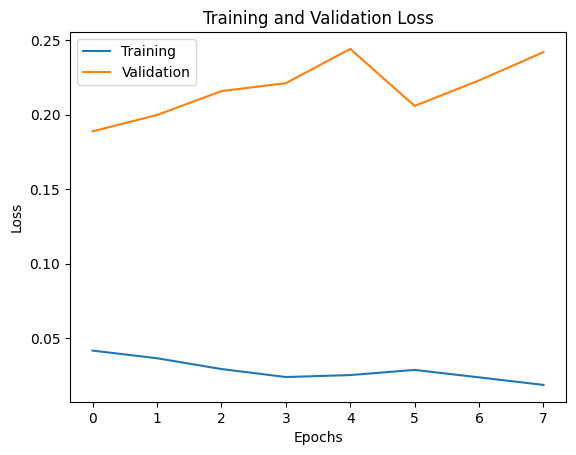

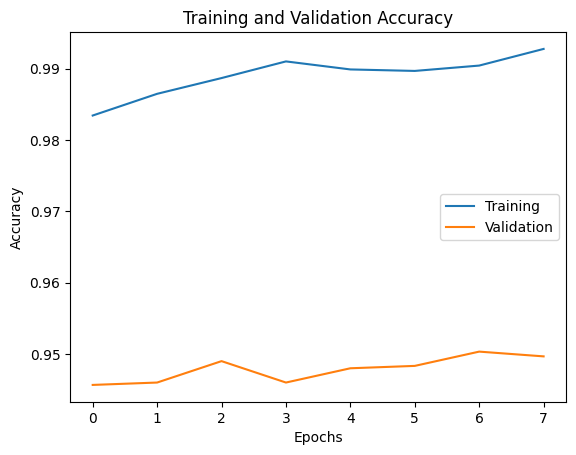

In [60]:
#Train the model with the tuned parameters
#You can also use methods like early stopping based on validation loss to counter overfitting, reducing the learning rate on plateau etc.
#Keep the batch size small (i.e 8 or 16) if you get a memory error

#https://keras.io/api/callbacks/early_stopping/
#https://keras.io/api/callbacks/reduce_lr_on_plateau/
 
#model.compile(loss=..., optimizer=..., metrics=['accuracy'])
model.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.SGD(learning_rate=0.001), metrics=['accuracy'])

#-------------------------------------
#history = model.fit(...)
# Eğitim ve doğrulama verileri üzerinde modeli eğitin
#Note: If you encounter a memory error, you can try reducing the batch size (e.g., 8 or 16).
history = model.fit(train_generator, batch_size=8, epochs=8, validation_data=val_generator, workers=8)
#-------------------------------------

#You can plot training/validation loss using history
#-------------------------------------
# Eğitim ve doğrulama kayıplarını grafik olarak çizdirin
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.show()

# Eğitim ve doğrulama doğruluklarını grafik olarak çizdirin
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.show()
#-------------------------------------

# Report your results

#...



## 8) Test your classifier on Test set

- Predict the labels of testing data **using the best model that you have selected according to your validation results** and report the accuracy. 

In [61]:
#-------------------------------------------
#accuracy_score fonksiyonunu kullanmak için sklearn.metrics kütüphanesini içe aktarıyoruz. Bu fonksiyon, doğruluk skorunu hesaplamak için kullanılacak.
from sklearn.metrics import accuracy_score
#-------------------------------------------


#-------------------------------------------
# Load test data
#val_datagen nesnesini kullanarak test verilerini yüklüyoruz. 
#flow_from_dataframe fonksiyonu, veri çerçevesinden verileri okuyarak bir veri üreteci oluşturur. 
#Bu üreteci, verileri belirtilen boyuta yeniden boyutlandırır ve örneklerin etiketlerini belirtir. 
test_generator = val_datagen.flow_from_dataframe(
    test_df, 
    data_path, 
    x_col='image_id',
    y_col='Male',
    #target_size argümanıyla görüntülerin boyutunu (224, 224) olarak belirtiyoruz. 
    target_size=(224, 224),
    #class_mode argümanı 'binary' olarak ayarlanır çünkü cinsiyet sınıflandırması yapıyoruz. 
    class_mode='binary',
    #batch_size ile her adımda kaç örneğin işleneceğini belirtiyoruz
    batch_size=batch_size,
    #shuffle argümanını False olarak ayarlayarak veri sıralamasının karıştırılmamasını sağlıyoruz. (Acaba karıştırsak ne fark olur ki? Hocaya sor)
    shuffle=False
)
#-------------------------------------------



#-------------------------------------------
# Predict
#Eğitilen modeli kullanarak test verileri üzerinde tahminler yapıyoruz. 
#model.predict() fonksiyonu, verilen girdi verileri üzerinde modelin tahminlerini döndürür. 
#Burada test_generator'ı girdi olarak kullanıyoruz.
test_predictions = model.predict(test_generator)

#Tahminler, olasılık değerleri olarak döndürüldüğü için, bunları 0.5 eşik değerinde ikili tahminlere dönüştürüyoruz. 
#Yani, 0.5'den büyük olan tahminler 1 (Erkek), diğerleri ise 0 (Kadın) olarak kabul edilir.
test_predictions = (test_predictions > 0.5).astype(int)
#-------------------------------------------



#-------------------------------------------
# Report your result
test_labels = test_generator.labels
test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test Accuracy:", test_accuracy)
#-------------------------------------------


Found 3000 validated image filenames belonging to 2 classes.
375/375 [==============================] - 18s 48ms/step
Test Accuracy: 0.949
